In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import tensorflow as tf
import tensorflow.keras as keras

2023-03-23 19:42:23.466239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

In [3]:
df = pd.read_csv('./spam.csv',encoding="ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
y = pd.get_dummies(df["v1"])

In [6]:
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


<AxesSubplot:>

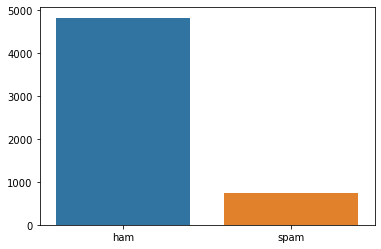

In [7]:
target = np.array(df['v1'])
frequency_dict = {}

for i in target:
    if i not in frequency_dict:
        frequency_dict[i] = 1
    else:
        frequency_dict[i]+=1
        
labels = list(frequency_dict.keys())
frequency = list(frequency_dict.values())

sns.barplot(x=labels,y=frequency)

### Cleaning msg

In [8]:
sw = stopwords.words('english')
lemmetizer = WordNetLemmatizer()
def clean_msg(text):
    new_msg = BeautifulSoup(text).get_text()
    new_alpha = re.sub("[^a-zA-Z]"," ",new_msg)
    new_words = new_alpha.lower().split()
    stops = set(sw)
    final_words = [lemmetizer.lemmatize(word) for word in new_words if word not in stops]
    return(" ".join(final_words))

In [9]:
df["cleaned msg"] = df["v2"].apply( lambda x: clean_msg(x))

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [10]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,cleaned msg
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,freemsg hey darling week word back like fun st...
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,mobile month u r entitled update latest colour...


## creating bag of  words

In [11]:
corpus=[]
for i in range (0,len(df)):
    msg = BeautifulSoup(df["cleaned msg"][i]).get_text()
    corpus.append(msg)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [13]:
len(df["cleaned msg"])

5572

In [14]:
y = y.iloc[: ,1].values

## Splitting into training and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

## Training the model using Naive Bayers algorithm

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train,y_train)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9717237629146275